# 数据可视化作业题目

In [410]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [411]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


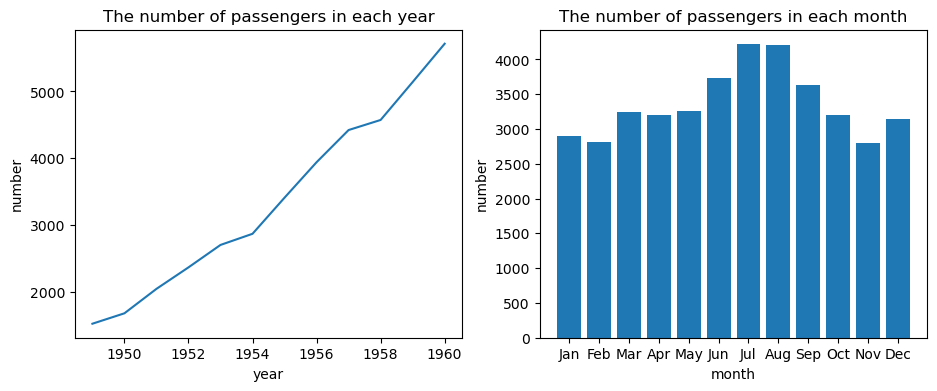

In [412]:
data_year = data.drop(columns="month").groupby("year").agg("sum")
data_month = data.drop(columns="year").groupby("month").agg("sum")

fig, ax = plt.subplots(1, 2, figsize=(11,4))
ax[0].plot(data_year.index, data_year.values)
ax[0].set_xlabel("year")
ax[0].set_ylabel("number")
ax[0].set_title("The number of passengers in each year")
ax[1].bar(data_month.index, data_month.values.reshape(1,-1)[0])
ax[1].set_xlabel("month")
ax[1].set_ylabel("number")
_ = ax[1].set_title("The number of passengers in each month")

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [413]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 's_w vs. p_w')

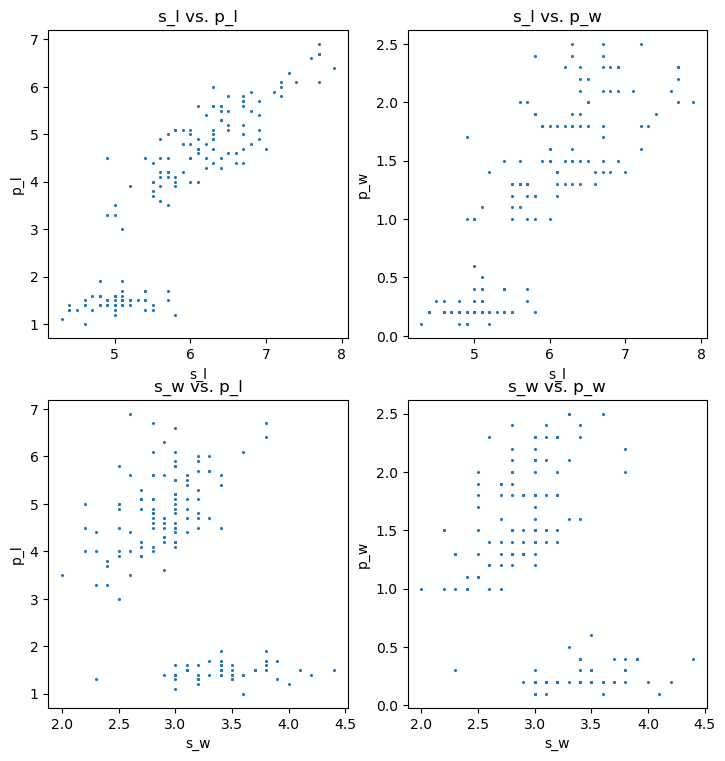

In [414]:
fig, ax = plt.subplots(2, 2, figsize=(8.5,8.8))
ax[0][0].scatter(data["sepal_length"], data["petal_length"], s=1.5)
ax[0][0].set_xlabel("s_l")
ax[0][0].set_ylabel("p_l")
ax[0][0].set_title("s_l vs. p_l")
ax[0][1].scatter(data["sepal_length"], data["petal_width"], s=1.5)
ax[0][1].set_xlabel("s_l")
ax[0][1].set_ylabel("p_w")
ax[0][1].set_title("s_l vs. p_w")
ax[1][0].scatter(data["sepal_width"], data["petal_length"], s=1.5)
ax[1][0].set_xlabel("s_w")
ax[1][0].set_ylabel("p_l")
ax[1][0].set_title("s_w vs. p_l")
ax[1][1].scatter(data["sepal_width"], data["petal_width"], s=1.5)
ax[1][1].set_xlabel("s_w")
ax[1][1].set_ylabel("p_w")
ax[1][1].set_title("s_w vs. p_w")

Text(0.5, 1.0, 's_w vs. p_w')

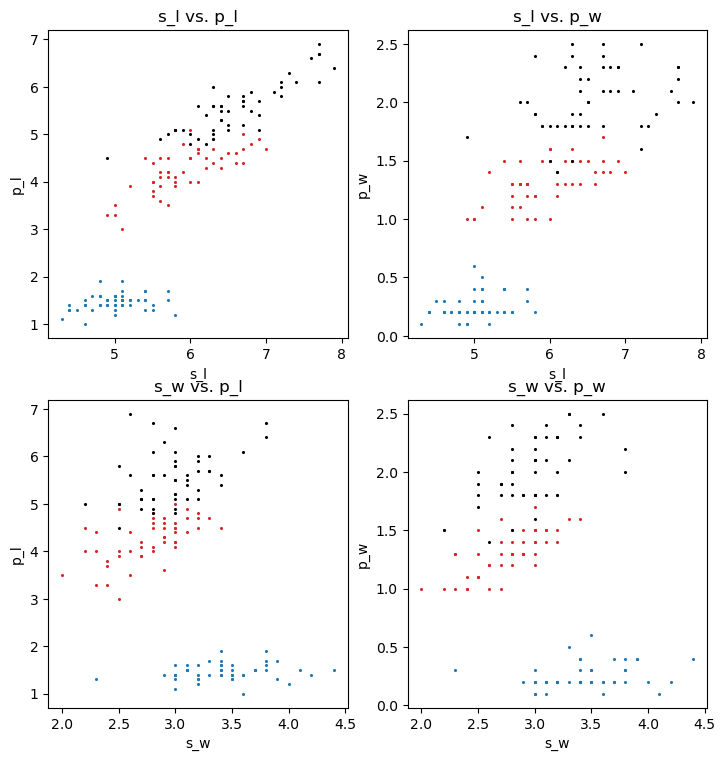

In [415]:
data_species = data.groupby("species")
group_name_list = ["setosa", "versicolor", "virginica"]
color_list = ["tab:blue", "tab:red", "black"]

fig, ax = plt.subplots(2, 2, figsize=(8.5,8.8))
for group_name, color in zip(group_name_list, color_list):
    data_species_ = data_species.get_group(group_name)
    ax[0][0].scatter(data_species_["sepal_length"], data_species_["petal_length"], s=1.5, c=color)
    ax[0][1].scatter(data_species_["sepal_length"], data_species_["petal_width"], s=1.5, c=color)
    ax[1][0].scatter(data_species_["sepal_width"], data_species_["petal_length"], s=1.5, c=color)
    ax[1][1].scatter(data_species_["sepal_width"], data_species_["petal_width"], s=1.5, c=color)
ax[0][0].set_xlabel("s_l")
ax[0][0].set_ylabel("p_l")
ax[0][0].set_title("s_l vs. p_l")
ax[0][1].set_xlabel("s_l")
ax[0][1].set_ylabel("p_w")
ax[0][1].set_title("s_l vs. p_w")
ax[1][0].set_xlabel("s_w")
ax[1][0].set_ylabel("p_l")
ax[1][0].set_title("s_w vs. p_l")
ax[1][1].set_xlabel("s_w")
ax[1][1].set_ylabel("p_w")
ax[1][1].set_title("s_w vs. p_w")

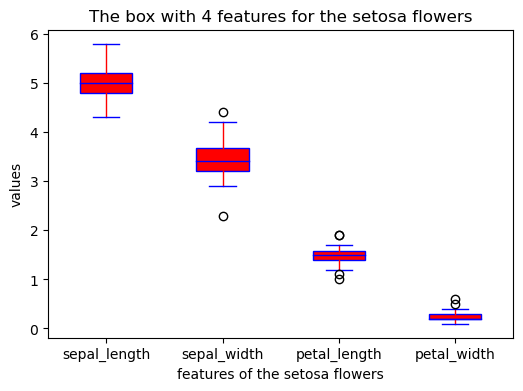

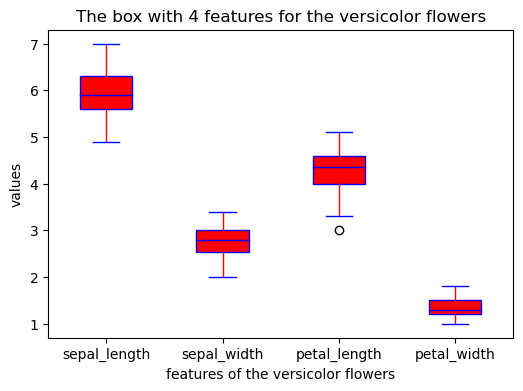

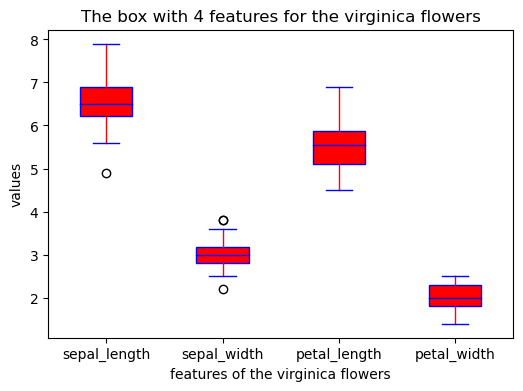

In [416]:
varible_name_list = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for group_name in group_name_list:
    fig, ax = plt.subplots(figsize=(6,4))
    data_species_ = data_species.get_group(group_name)
    ax.boxplot(data_species_.drop(columns="species"), patch_artist = True,
               medianprops = {'color': 'b'},
               boxprops = {'color': 'b', 'facecolor': 'r'},
               whiskerprops = {'color': 'r'},
               capprops = {'color': 'b'}
               )
    ax.set_xlabel(f"features of the {group_name} flowers")
    ax.set_xticks([x + 1 for x in range(4)], labels=varible_name_list)
    ax.set_ylabel("values")
    ax.set_title(f"The box with 4 features for the {group_name} flowers")

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [417]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


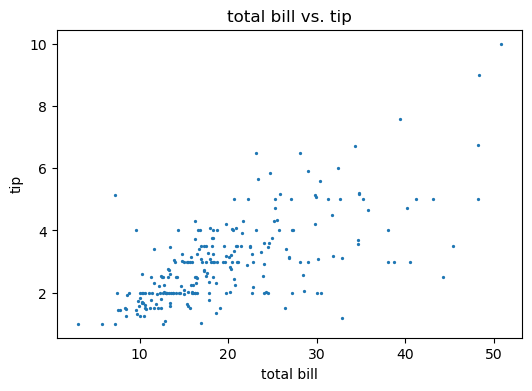

In [418]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data["total_bill"], data["tip"], s=1.8)
ax.set_xlabel("total bill")
ax.set_ylabel("tip")
_ = ax.set_title("total bill vs. tip")

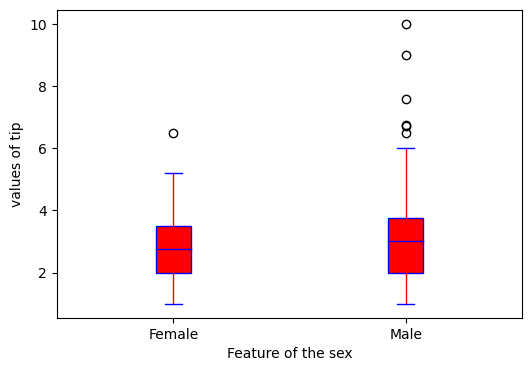

In [419]:
data_sex = data.groupby("sex")
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_sex.get_group("Female")["tip"], data_sex.get_group("Male")["tip"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the sex")
ax.set_xticks([x + 1 for x in range(2)], labels=["Female", "Male"])
_ = ax.set_ylabel("values of tip")

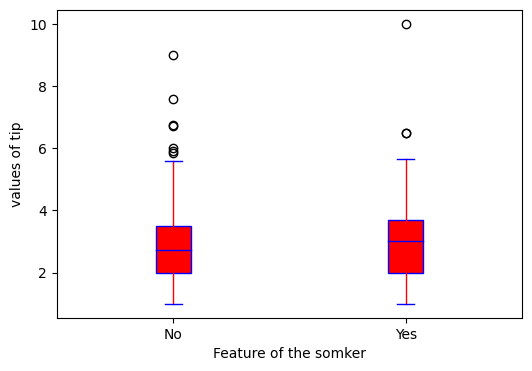

In [420]:
data_sex = data.groupby("smoker")
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_sex.get_group("No")["tip"], data_sex.get_group("Yes")["tip"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the somker")
ax.set_xticks([x + 1 for x in range(2)], labels=["No", "Yes"])
_ = ax.set_ylabel("values of tip")

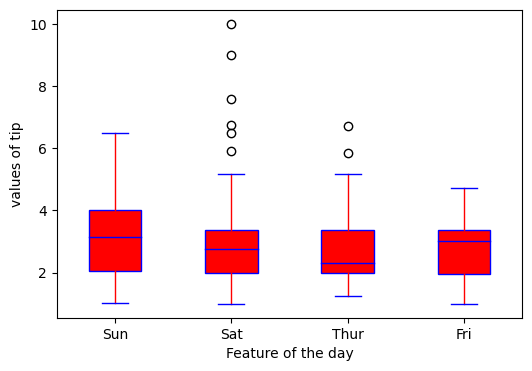

In [421]:
data_sex = data.groupby("day")
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_sex.get_group("Sun")["tip"], data_sex.get_group("Sat")["tip"], data_sex.get_group("Thur")["tip"], data_sex.get_group("Fri")["tip"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the day")
ax.set_xticks([x + 1 for x in range(4)], labels=["Sun", "Sat", "Thur", "Fri"])
_ = ax.set_ylabel("values of tip")

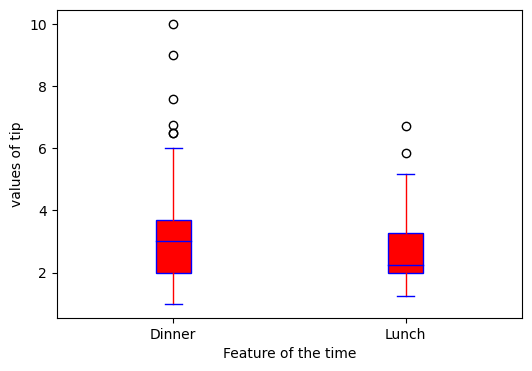

In [422]:
data_sex = data.groupby("time")
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_sex.get_group("Dinner")["tip"], data_sex.get_group("Lunch")["tip"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the time")
ax.set_xticks([x + 1 for x in range(2)], labels=["Dinner", "Lunch"])
_ = ax.set_ylabel("values of tip")

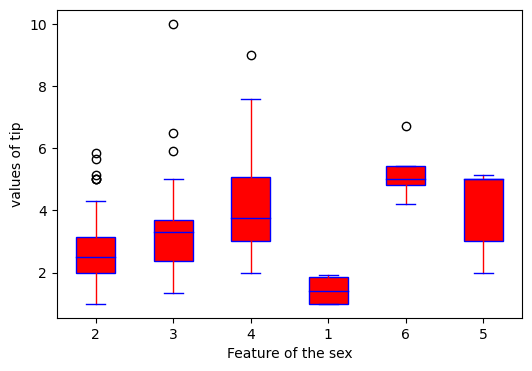

In [423]:
data_sex = data.groupby("size")
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_sex.get_group(2)["tip"], data_sex.get_group(3)["tip"],
            data_sex.get_group(4)["tip"], data_sex.get_group(1)["tip"],
            data_sex.get_group(6)["tip"], data_sex.get_group(5)["tip"]], 
           patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the sex")
ax.set_xticks([x + 1 for x in range(6)], labels=['2','3','4','1','6','5'])
_ = ax.set_ylabel("values of tip")

In [424]:
data[["sex","smoker","tip"]].groupby("smoker").get_group("No").groupby("sex").mean("tip")["tip"]

sex
Male      3.113402
Female    2.773519
Name: tip, dtype: float64

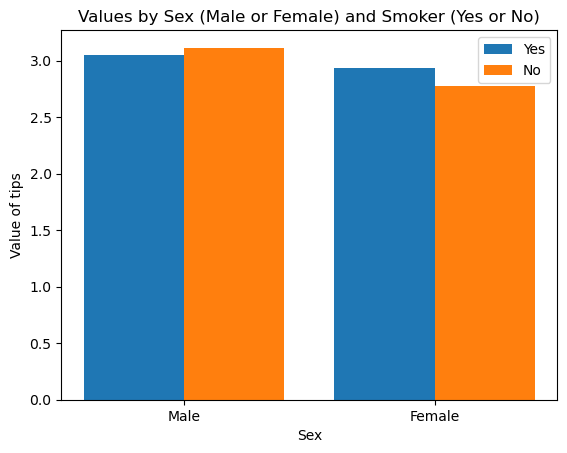

In [425]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, x_ticks, y_label, title):
    _, ax = plt.subplots()
    total_width = 0.8
    ind_width = total_width / len(y_data_list)
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    for i in range(0, len(y_data_list)):
        ax.bar(x_data + alteration[i], y_data_list[i], color=colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data, x_ticks)
    ax.set_title(title)
    ax.legend(loc = 'best')

groupedbarplot([0, 1],
               [data[["sex","smoker","tip"]].groupby("smoker").get_group("Yes").groupby("sex").mean("tip")["tip"],
                data[["sex","smoker","tip"]].groupby("smoker").get_group("No").groupby("sex").mean("tip")["tip"]
                ],
               ["Yes", "No"],
               ["tab:blue", "tab:orange"],
               "Sex", 
               ["Male", "Female"],
               "Value of tips",
               "Values by Sex (Male or Female) and Smoker (Yes or No)")

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [426]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


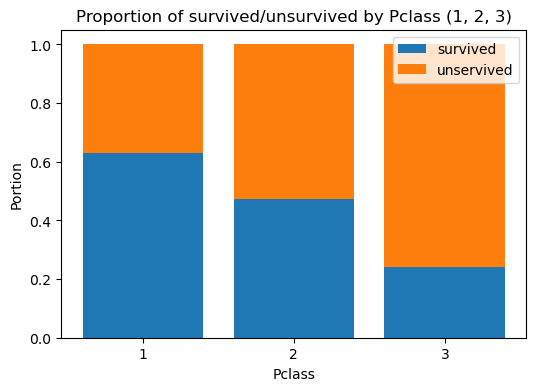

In [427]:
survive_dict = {
    "survived":  [data.groupby("pclass").get_group(i)["survived"].sum() / len(data.groupby("pclass").get_group(i)["survived"]) for i in (1,2,3)],
    "unservived": [1-data.groupby("pclass").get_group(i)["survived"].sum() / len(data.groupby("pclass").get_group(i)["survived"]) for i in (1,2,3)],
}
bottom = np.zeros(3)

fig, ax = plt.subplots(figsize=(6,4))
for survi, weight_count in survive_dict.items():
    ax.bar(["1","2","3"], weight_count, bottom=bottom, label=survi)
    bottom += weight_count

ax.set_xlabel("Pclass")
ax.set_ylabel("Portion")
ax.set_title("Proportion of survived/unsurvived by Pclass (1, 2, 3)")
ax.legend(loc="upper right")

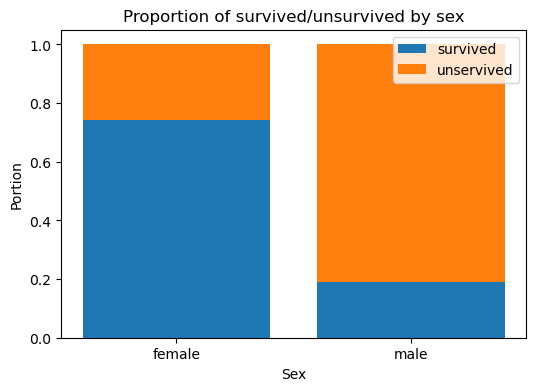

In [428]:
survive_dict = {
    "survived":  [data.groupby("sex").get_group(i)["survived"].sum() / len(data.groupby("sex").get_group(i)["survived"]) for i in ("female", "male")],
    "unservived": [1-data.groupby("sex").get_group(i)["survived"].sum() / len(data.groupby("sex").get_group(i)["survived"]) for i in ("female", "male")],
}
bottom = np.zeros(2)

fig, ax = plt.subplots(figsize=(6,4))
for survi, weight_count in survive_dict.items():
    ax.bar(["female","male"], weight_count, bottom=bottom, label=survi)
    bottom += weight_count

ax.set_xlabel("Sex")
ax.set_ylabel("Portion")
ax.set_title("Proportion of survived/unsurvived by sex")
ax.legend(loc="upper right")

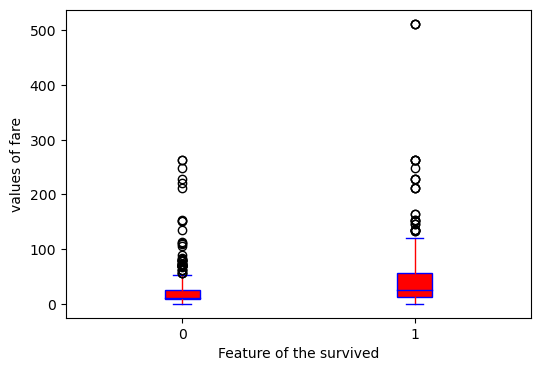

In [429]:
data_survived = data.groupby("survived")

fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_survived.get_group(0)["fare"], data_survived.get_group(1)["fare"]], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the survived")
ax.set_xticks([1,2], [0,1])
_ = ax.set_ylabel("values of fare")

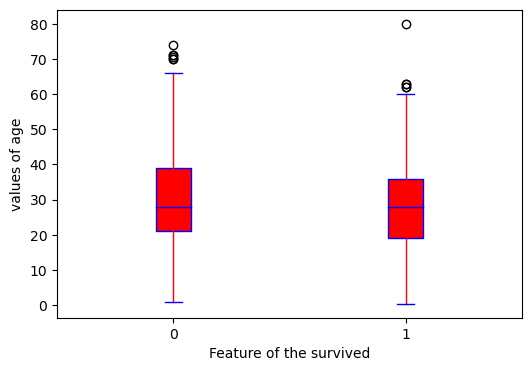

In [430]:
data_survived = data.groupby("survived")

fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_survived.get_group(0)["age"].dropna(), data_survived.get_group(1)["age"].dropna()], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the survived")
ax.set_xticks([1,2], [0,1])
_ = ax.set_ylabel("values of age")

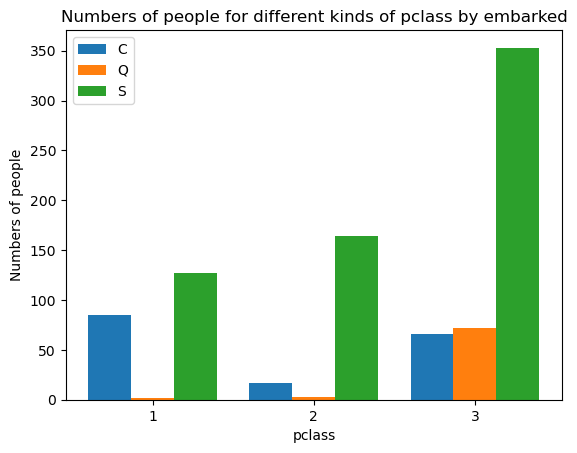

In [431]:
groupedbarplot([0, 1, 2],
               [data.groupby("embarked").get_group("C").groupby("pclass").count()["embarked"],
                data.groupby("embarked").get_group("Q").groupby("pclass").count()["embarked"],
                data.groupby("embarked").get_group("S").groupby("pclass").count()["embarked"]],
               ["C", "Q", "S"],
               ["tab:blue", "tab:orange", "tab:green"],
               "pclass", 
               ["1", "2", "3"],
               "Numbers of people",
               "Numbers of people for different kinds of pclass by embarked")

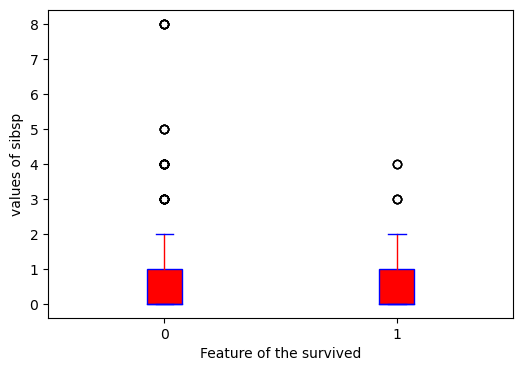

In [432]:
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_survived.get_group(0)["sibsp"].dropna(), data_survived.get_group(1)["sibsp"].dropna()], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the survived")
ax.set_xticks([1,2], [0,1])
_ = ax.set_ylabel("values of sibsp")

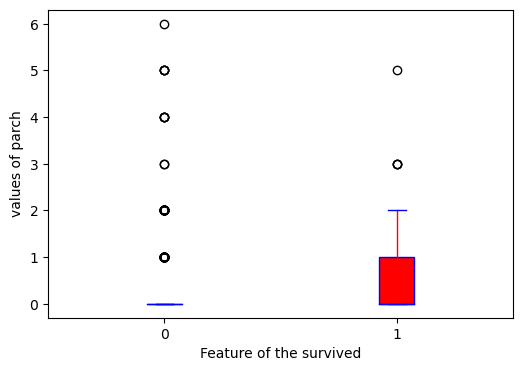

In [433]:
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot([data_survived.get_group(0)["parch"].dropna(), data_survived.get_group(1)["parch"].dropna()], patch_artist = True,
           medianprops = {'color': 'b'},
           boxprops = {'color': 'b', 'facecolor': 'r'},
           whiskerprops = {'color': 'r'},
           capprops = {'color': 'b'}
           )
ax.set_xlabel("Feature of the survived")
ax.set_xticks([1,2], [0,1])
_ = ax.set_ylabel("values of parch")

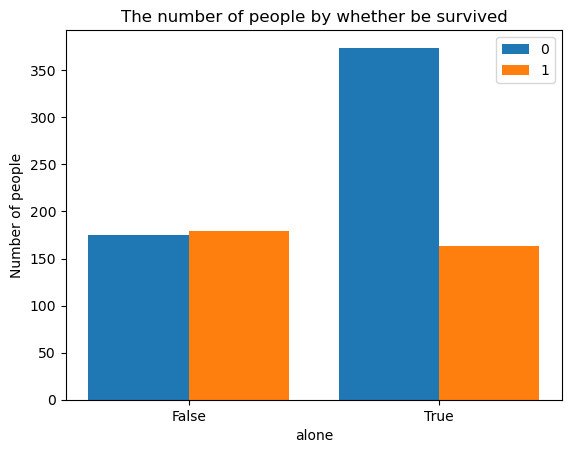

In [435]:
groupedbarplot([0, 1],
               [data.groupby("survived").get_group(0).groupby("alone").count()["alive"],
                data.groupby("survived").get_group(1).groupby("alone").count()["alive"]],
               ["0", "1"],
               ["tab:blue", "tab:orange"],
               "alone", 
               ["False", "True"],
               "Number of people",
               "The number of people by whether be survived")